### 📋 Dataset Columns Description

| Column Name        | Description                                                                                       |
| ------------------ | ------------------------------------------------------------------------------------------------- |
| `customerID`       | Unique ID assigned to each customer.                                                              |
| `gender`           | Gender of the customer: `Male` or `Female`.                                                       |
| `SeniorCitizen`    | Indicates if the customer is a senior citizen: `1` (Yes), `0` (No).                               |
| `Partner`          | Whether the customer has a partner: `Yes` or `No`.                                                |
| `Dependents`       | Whether the customer has dependents: `Yes` or `No`.                                               |
| `tenure`           | Number of months the customer has stayed with the company.                                        |
| `PhoneService`     | Whether the customer has a phone service: `Yes` or `No`.                                          |
| `MultipleLines`    | Indicates if the customer has multiple phone lines: `Yes`, `No`, or `No phone service`.           |
| `InternetService`  | Type of internet service: `DSL`, `Fiber optic`, or `No`.                                          |
| `OnlineSecurity`   | Whether the customer has online security: `Yes`, `No`, or `No internet service`.                  |
| `OnlineBackup`     | Whether the customer has online backup: `Yes`, `No`, or `No internet service`.                    |
| `DeviceProtection` | Whether the customer has device protection: `Yes`, `No`, or `No internet service`.                |
| `TechSupport`      | Whether the customer has tech support: `Yes`, `No`, or `No internet service`.                     |
| `StreamingTV`      | Whether the customer streams TV: `Yes`, `No`, or `No internet service`.                           |
| `StreamingMovies`  | Whether the customer streams movies: `Yes`, `No`, or `No internet service`.                       |
| `Contract`         | Customer contract type: `Month-to-month`, `One year`, or `Two year`.                              |
| `PaperlessBilling` | Whether the customer uses paperless billing: `Yes` or `No`.                                       |
| `PaymentMethod`    | Payment method used: e.g., `Electronic check`, `Mailed check`, `Bank transfer`, or `Credit card`. |
| `MonthlyCharges`   | The amount charged to the customer monthly.                                                       |
| `TotalCharges`     | The total amount charged to the customer.                                                         |
| `Churn`            | Target variable – whether the customer has churned: `Yes` or `No`.                                |



**IMPORT DEPENDENCIES**

In [44]:

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import pickle
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [45]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Data Collection and Cleaning

In [46]:
# loading the data into a pandas dataframe 
df = pd.read_csv("C:/Users/USER/Desktop/Datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [47]:
# checking number of rows and columns 
df.shape

(7043, 21)

In [48]:
# overview of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [49]:
# remove customerID column
df = df.drop('customerID', axis=1)
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [50]:
# missing TotalCharges(represented as blank space)
df[df['TotalCharges'] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [51]:
# replace blank spaces in 'TotalCharges' with '0.0'
df['TotalCharges'] = df['TotalCharges'].replace(' ', '0.0')

# convert to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

df['TotalCharges'].dtypes

dtype('float64')

In [52]:
# distribution of unique values for each columns
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in df.columns:
    if col not in num_features:
        print(df[col].value_counts())
        print('-'*40)

gender
Male      3555
Female    3488
Name: count, dtype: int64
----------------------------------------
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
----------------------------------------
Partner
No     3641
Yes    3402
Name: count, dtype: int64
----------------------------------------
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
----------------------------------------
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
----------------------------------------
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
----------------------------------------
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
----------------------------------------
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
----------------------------------------
OnlineBackup
No          

### Exploratory Data Analysis

In [53]:
# summary statistics 
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


**Numerical Features Distribution**

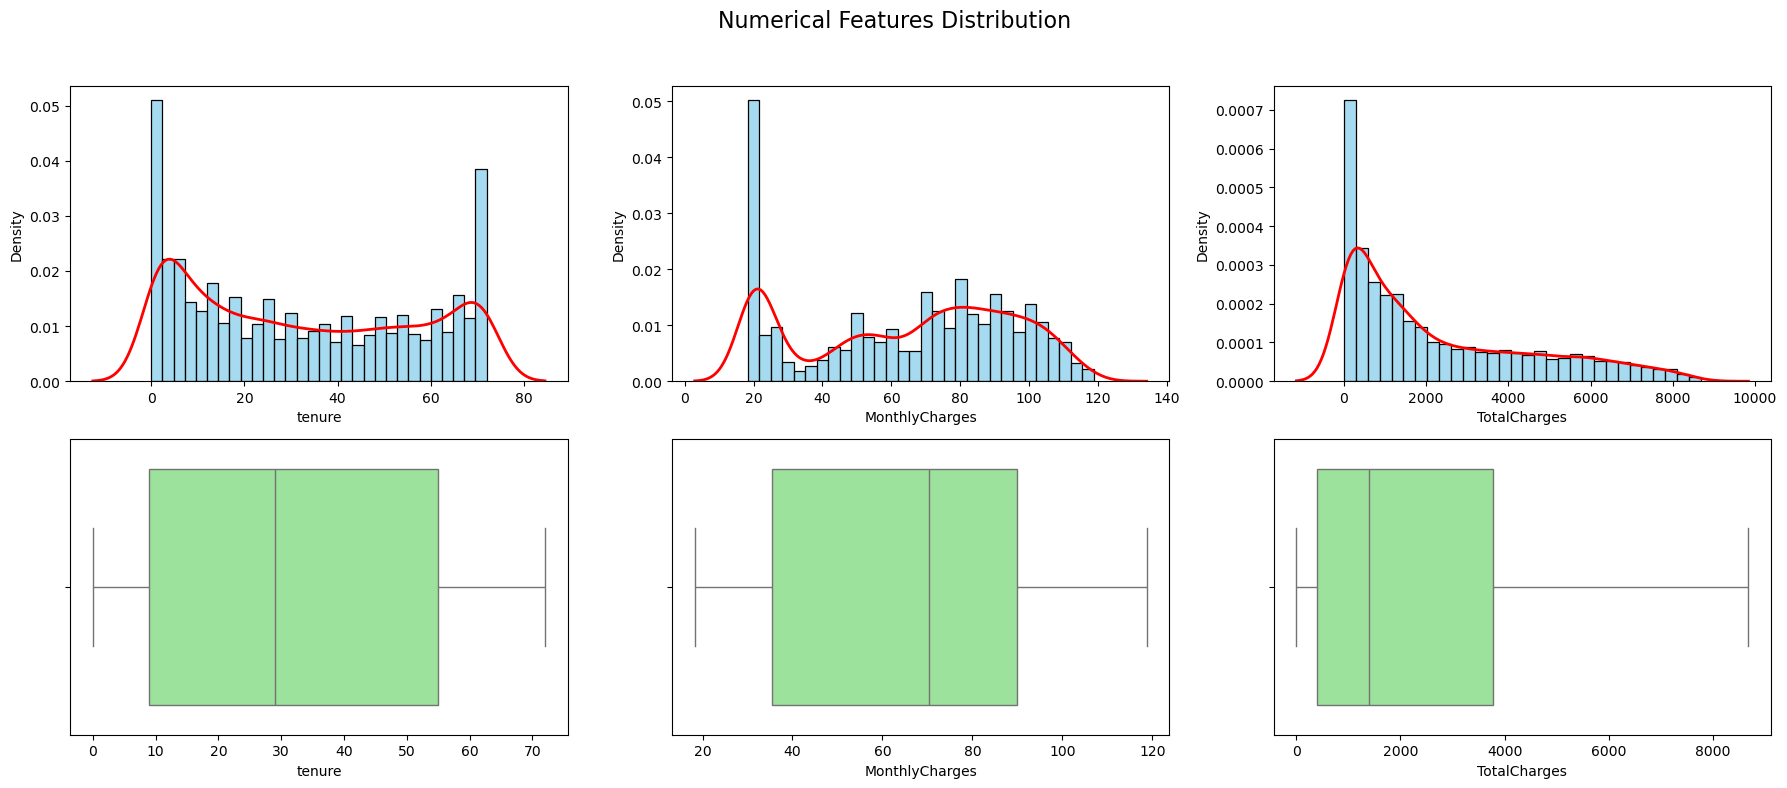

In [54]:
# create subplots with 2 rows, 3 columns (one for each feature)
fig, axes = plt.subplots(2, 3, figsize=(18, 8))

# plot histograms and KDEs on the first row
for i, col in enumerate(num_features):
    sns.histplot(data=df, x=col, ax=axes[0, i], color='skyblue', bins=30, stat='density')
    sns.kdeplot(data=df, x=col, ax=axes[0, i], color='red', linewidth=2)
    axes[0, i].set_xlabel(col)
    axes[0, i].set_ylabel('Density')

# plot boxplots on the second row
for i, col in enumerate(num_features):
    sns.boxplot(data=df, x=col, ax=axes[1, i], color='lightgreen')
    axes[1, i].set_xlabel(col)

# ddd a general title
fig.suptitle("Numerical Features Distribution", fontsize=16)

# Adjust spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


**Correlation Heatmap of Numerical Features(checking for multicolinearity)**

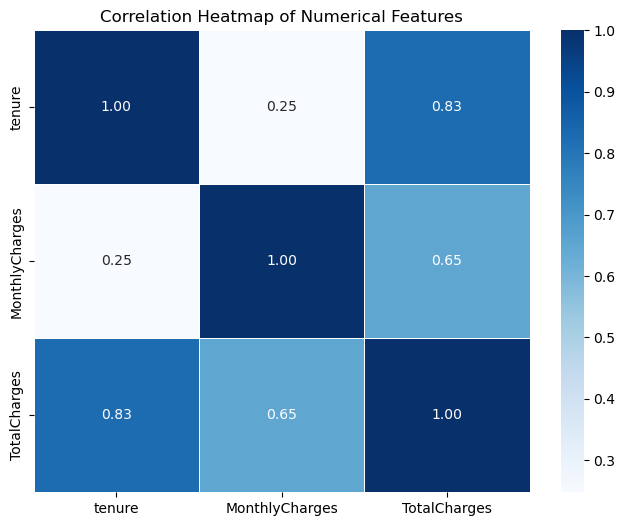

In [55]:
# define the numerical features
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Compute the correlation matrix
corr_matrix = df[num_features].corr()

# plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [56]:
# categorical columns
cat_features = df.select_dtypes(include='object').columns.to_list()
cat_features

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

**Distribution for Categorical Features**

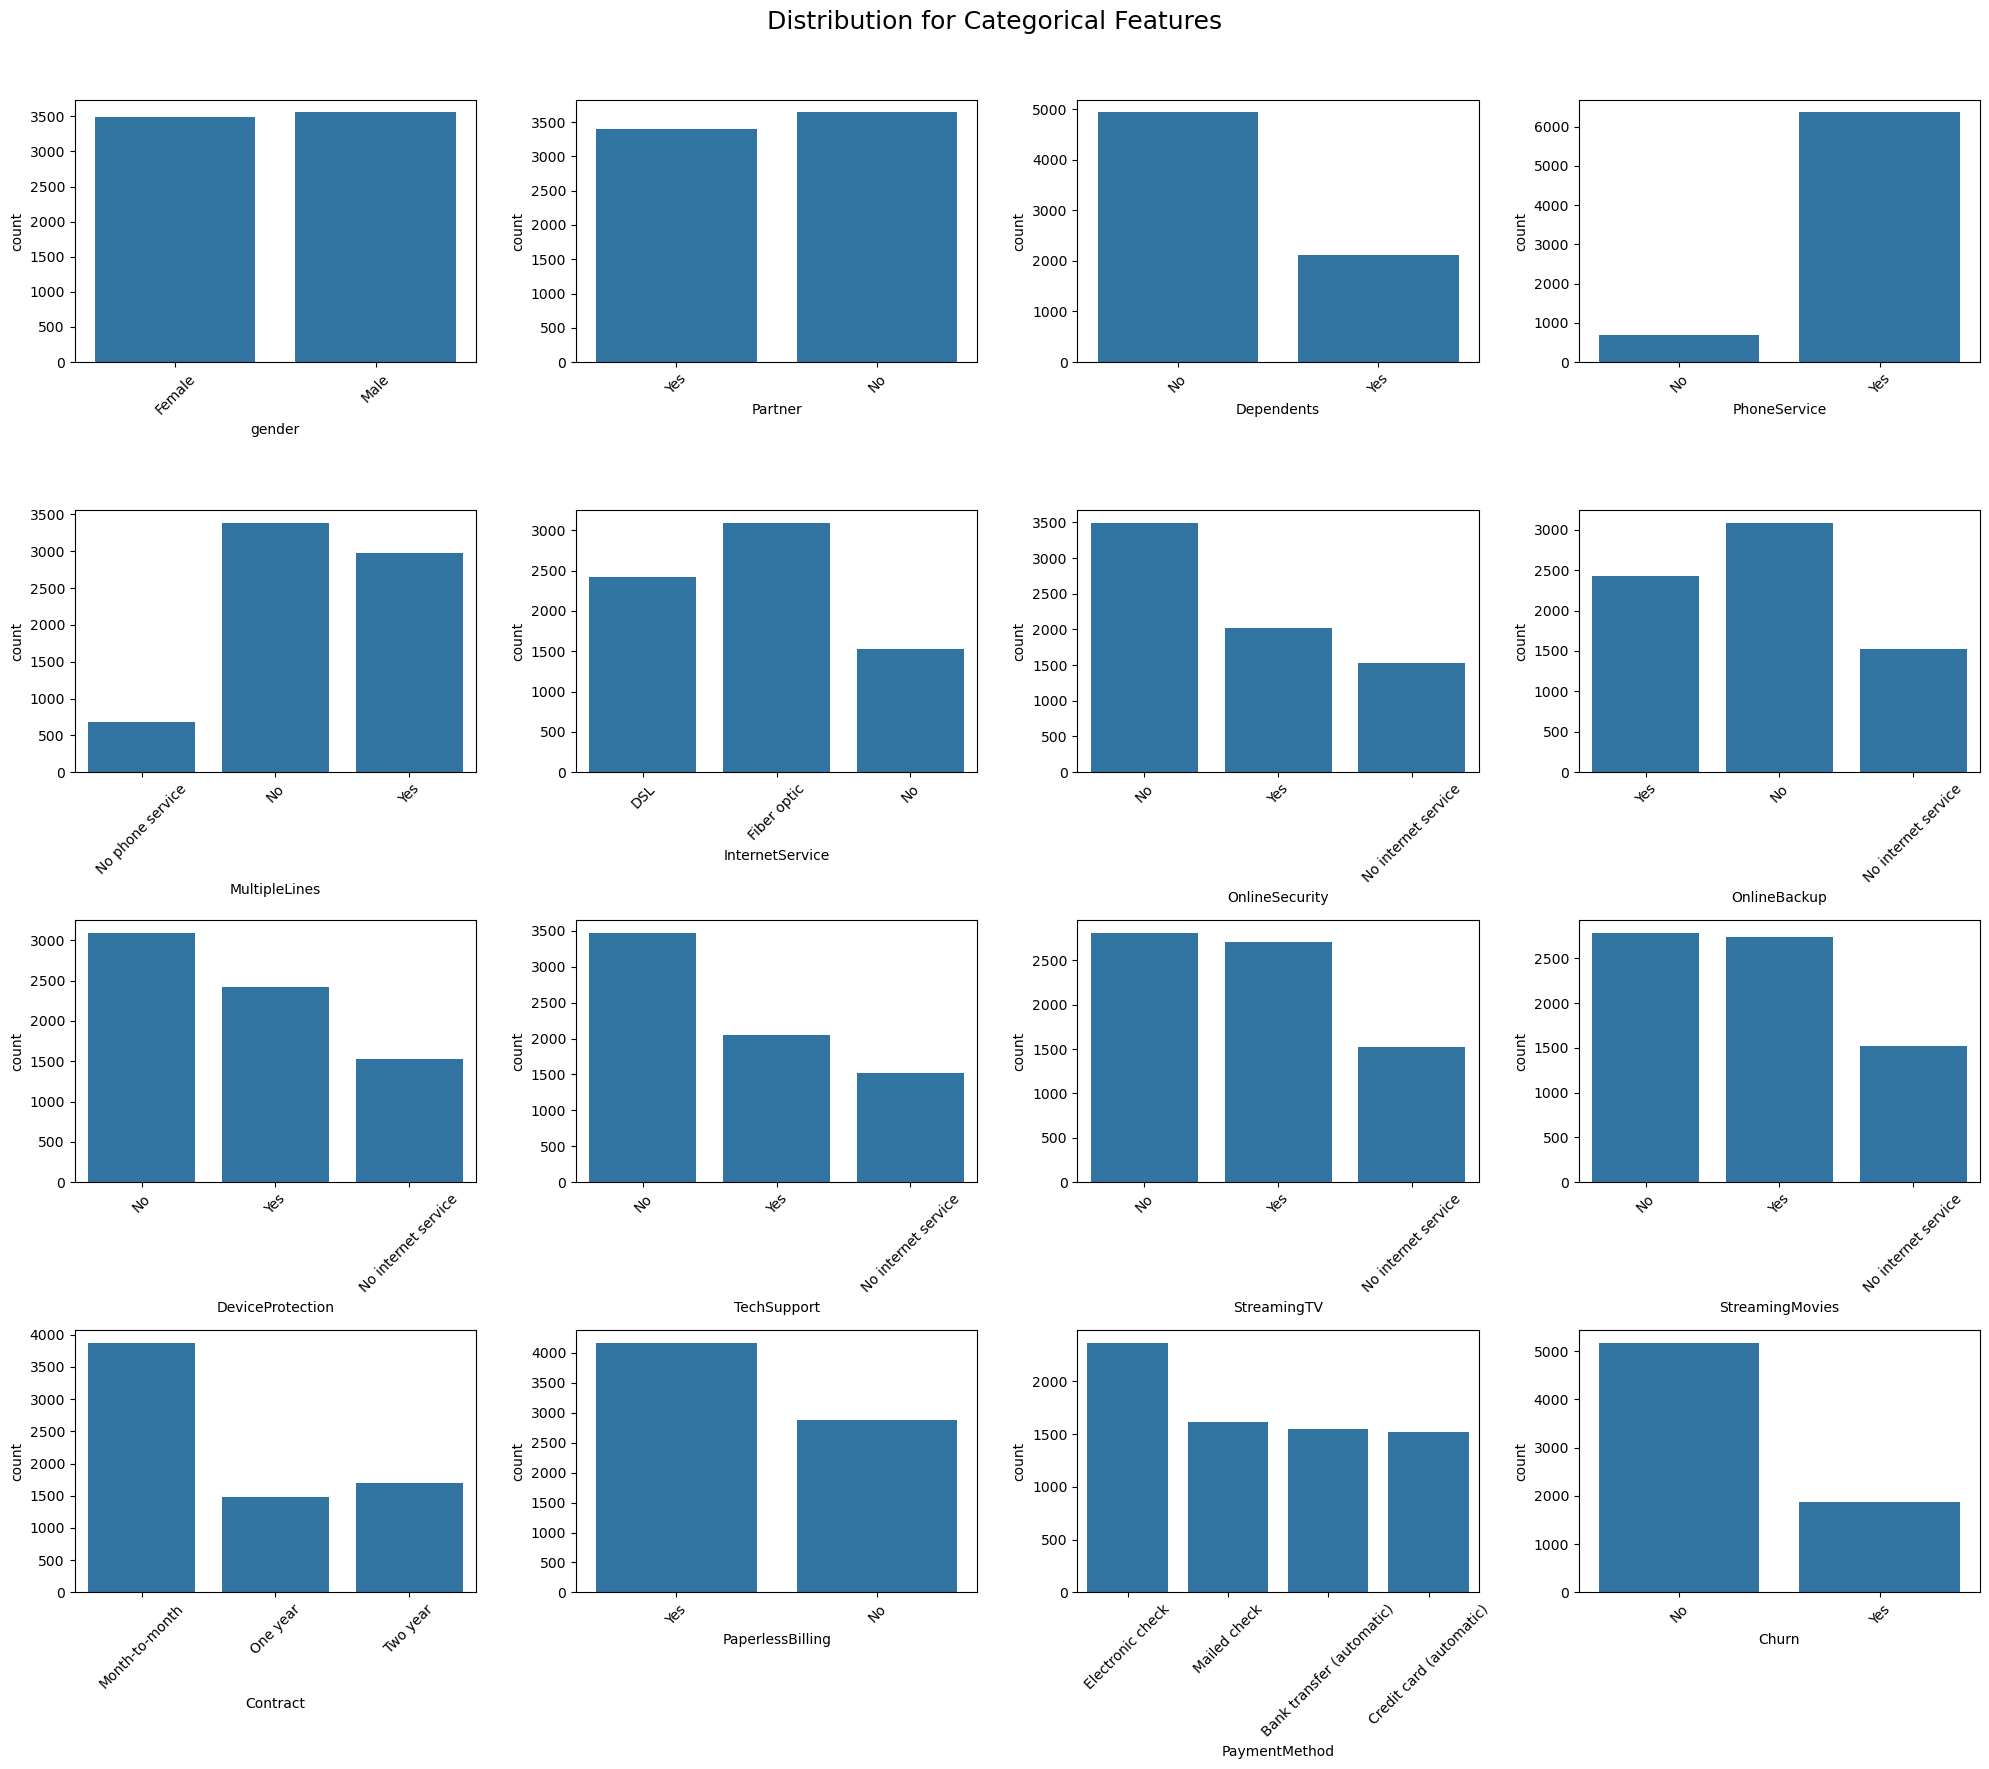

In [57]:
# set up a 4x4 grid for countplots
fig, axes = plt.subplots(4, 4, figsize=(20, 18))
axes = axes.flatten()

# plot countplot each categorical feature
for i, col in enumerate(cat_features):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots if there are less than 16 features
for j in range(len(cat_features), 16):
    fig.delaxes(axes[j])

# Set a general title
fig.suptitle("Distribution for Categorical Features", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Data Pre-Processing

**Label Encoding**

In [58]:
# for target column 
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [59]:
# for categorical features
encoders = {}

# apply label encoding to all categorical columns except 'Churn'
for col in cat_features:
    if col != 'Churn':  # skip 'Churn'
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])
        encoders[col] = label_encoder

# save encoders to file
with open('encoders_2.pki', 'wb') as f:
    pickle.dump(encoders, f)

In [18]:
print(encoders)

{'gender': LabelEncoder(), 'Partner': LabelEncoder(), 'Dependents': LabelEncoder(), 'PhoneService': LabelEncoder(), 'MultipleLines': LabelEncoder(), 'InternetService': LabelEncoder(), 'OnlineSecurity': LabelEncoder(), 'OnlineBackup': LabelEncoder(), 'DeviceProtection': LabelEncoder(), 'TechSupport': LabelEncoder(), 'StreamingTV': LabelEncoder(), 'StreamingMovies': LabelEncoder(), 'Contract': LabelEncoder(), 'PaperlessBilling': LabelEncoder(), 'PaymentMethod': LabelEncoder()}


**Seperating Features and Target**

In [19]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [20]:
print(X)


      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0     

In [21]:
print(y)

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64


**Seperate Training and Test data**

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=13)

In [23]:
print(X.shape, X_train.shape, X_test.shape)

(7043, 19) (5986, 19) (1057, 19)


In [24]:
print(y_train.value_counts())

Churn
0    4393
1    1593
Name: count, dtype: int64


In [25]:
print(y_test.value_counts())

Churn
0    781
1    276
Name: count, dtype: int64


**Under Sampling**

In [26]:
# Concatenate X and y for easy downsampling
df_downsample = pd.concat([X_train, y_train], axis=1)

# Separate majority and minority classes
majority_class = df_downsample[df_downsample['Churn'] == 0]
minority_class = df_downsample[df_downsample['Churn'] == 1]

# Downsample majority class
majority_downsampled = resample(majority_class,
                                replace=False,              # sample without replacement
                                n_samples=len(minority_class),  # match minority count
                                random_state=13)

# Combine minority and downsampled majority
df_balanced = pd.concat([majority_downsampled, minority_class])

# Shuffle the balanced dataset
df_balanced = df_balanced.sample(frac=1, random_state=13).reset_index(drop=True)

# Split X and y again
X_train_downsampled = df_balanced.drop('Churn', axis=1)
y_train_downsampled = df_balanced['Churn']

In [27]:
print(y_train_downsampled.value_counts())

Churn
0    1593
1    1593
Name: count, dtype: int64


### Model Selection

**Hyperparameter Tuning**

In [28]:
# define model hyperparameter grids
model_params = {
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20, 50],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [25, 50, 100],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'bootstrap': [True, False]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7, 10],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.5, 0.7, 1.0],
            'colsample_bytree': [0.5, 0.7, 1.0]
        }
    }
}

# run RandomizedSearchCV for each model
scores = []

for model_name, mp in model_params.items():
    clf = RandomizedSearchCV(  # <--- fix here
        estimator=mp['model'],
        param_distributions=mp['params'],
        n_iter=50,
        cv=5,
        scoring='accuracy',
        random_state=13,
        n_jobs=-1,
        verbose=True
    )
    
    clf.fit(X_train_downsampled, y_train_downsampled)
    
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

# create and display results DataFrame
df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [29]:
pd.set_option('display.max_colwidth', None)
display(df)

,model,best_score,best_params
0,DecisionTree,0.716253,"{'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10, 'criterion': 'entropy'}"
1,RandomForest,0.768673,"{'n_estimators': 25, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10, 'bootstrap': True}"
2,XGBoost,0.769298,"{'subsample': 0.7, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.5}"


### Model Training

In [60]:
# best hyperparameters from tuning
best_params = {'subsample': 0.7, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.5}

# Retrain the best model
best_model = XGBClassifier(**best_params)
best_model.fit(X_train_downsampled, y_train_downsampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

### Model Evaluation

In [61]:
y_pred = best_model.predict(X_test)

In [62]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.7644276253547777


In [63]:
# classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.74      0.82       781
           1       0.53      0.82      0.65       276

    accuracy                           0.76      1057
   macro avg       0.73      0.78      0.73      1057
weighted avg       0.82      0.76      0.78      1057



Text(58.222222222222214, 0.5, 'Truth')

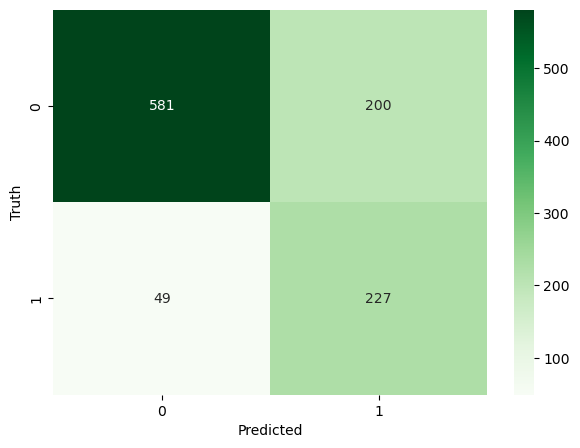

In [64]:
# confusion matrix and visualization
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [65]:
fn = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
 'PaperlessBilling', 'PaymentMethod']


# save the model
model = {'model':best_model, 'features_names':fn}

with open('churn_pred_model_2.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as 'churn_pred_model.pkl'")

Model saved as 'churn_pred_model.pkl'


### Predictive System

In [66]:
# load the the model and encoders 
with open('churn_pred_model_2.pkl', 'rb') as f:
    saved_model = pickle.load(f)

    Model = model['model']
    Features = model['features_names']

with open('encoders.pki', 'rb') as f: 
    encoders = pickle.load(f)

In [67]:
print(Model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)


In [68]:
print(Features)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [69]:
customer_data = {
    'gender': 'Male',
    'SeniorCitizen': 0,
    'Partner': 'No',
    'Dependents': 'No',
    'tenure': 49,
    'PhoneService': 'Yes',
    'MultipleLines': 'Yes',
    'InternetService': 'Fiber optic',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'Yes',
    'TechSupport': 'No',
    'StreamingTV': 'Yes',
    'StreamingMovies': 'Yes',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Bank transfer (automatic)',
    'MonthlyCharges': 103.7,
    'TotalCharges': 5036.3
}


In [70]:
input_data = pd.DataFrame(customer_data, index=[0])

# encode categorical values 
for col, encoder in encoders.items():
    input_data[col] = encoder.transform(input_data[col])

In [71]:
print(input_data)

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        0           0      49             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              2                1               0             2   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 2            0            2                2         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                 1              0           103.7        5036.3  


In [72]:
# prediction 
prediction = Model.predict(input_data)
pred_probability = Model.predict_proba(input_data)

print('Churn' if prediction[0] == 1 else 'Not Churn')
print('Prediction Probability: ', pred_probability)

Churn
Prediction Probability:  [[0.43060523 0.56939477]]


**43.06% chance the customer will not churn (class 0)**

**56.94% chance the customer will churn (class 1)**